___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()
#dataset consists of 14 columns. 
#It has 13 information attributes(features) about the employee. 
#target attribute is Exited that tells whether the person leaves the bank or not.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()
# there is float64(2), int64(9), object(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Exploratory Data Analysis and Visualization

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [6]:
df.corr()
#calculate the correlation between columns in a DataFrame

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000,0.004,0.006,0.001,-0.006,-0.009,0.007,0.001,0.012,-0.006,-0.017
CustomerId,0.004,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.006,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.001,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.006,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.009,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.007,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,0.001,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.012,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.006,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


In [7]:
df.head()
#dataset consists of 14 columns. 
#It has 13 information attributes(features) about the employee. 
#target attribute is Exited that tells whether the person leaves the bank or not.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
df.shape

(10000, 14)

In [9]:
df.info()
# there is float64(2), int64(8), object(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [11]:
df.corr()
#calculate the correlation between columns in a DataFrame

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000,0.004,0.006,0.001,-0.006,-0.009,0.007,0.001,0.012,-0.006,-0.017
CustomerId,0.004,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.006,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.001,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.006,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.009,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.007,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,0.001,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.012,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.006,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum().any()
#  null values

False

In [14]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [15]:
# some columns are totally unproductive so I remove them
# also exclude the surname because it is debatable because it could lead to profiling.
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [17]:
df.dtypes
#we have 2 column need to encode

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
#column Geography have text data so let's one hot encode it

#Geography_df = pd.get_dummies(prefix='Geo',data=df,columns=['Geography'])

In [19]:
#Geography_df.head()

In [20]:
#also column Gender have text data so let's one hot encode it too
#Labelling the Gender value as 0 and 1.
#Gender_df = Geography_df.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [21]:
#Gender_df.head()

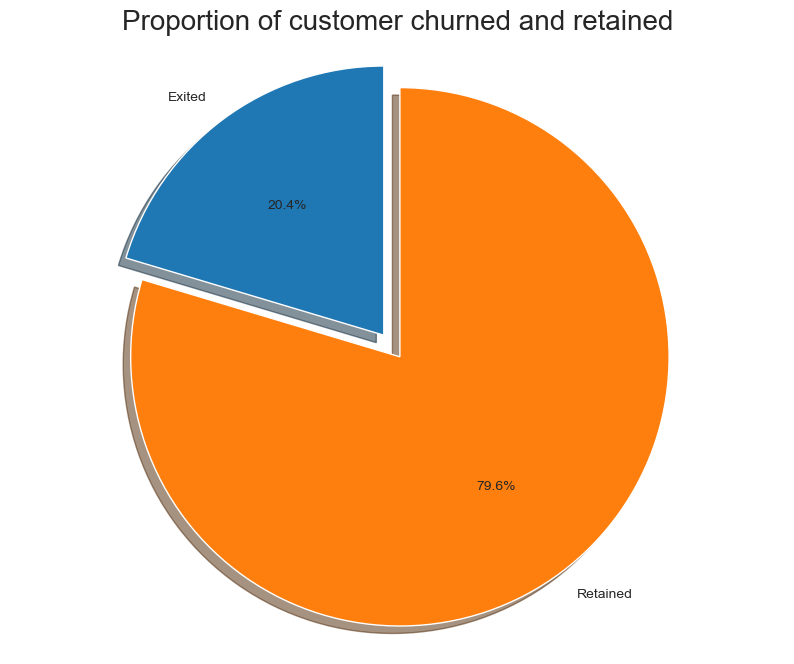

In [22]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# about 20% of the customers have churned.
# There seems to be an imbalance situation, but we will make the final decision after the model performance.

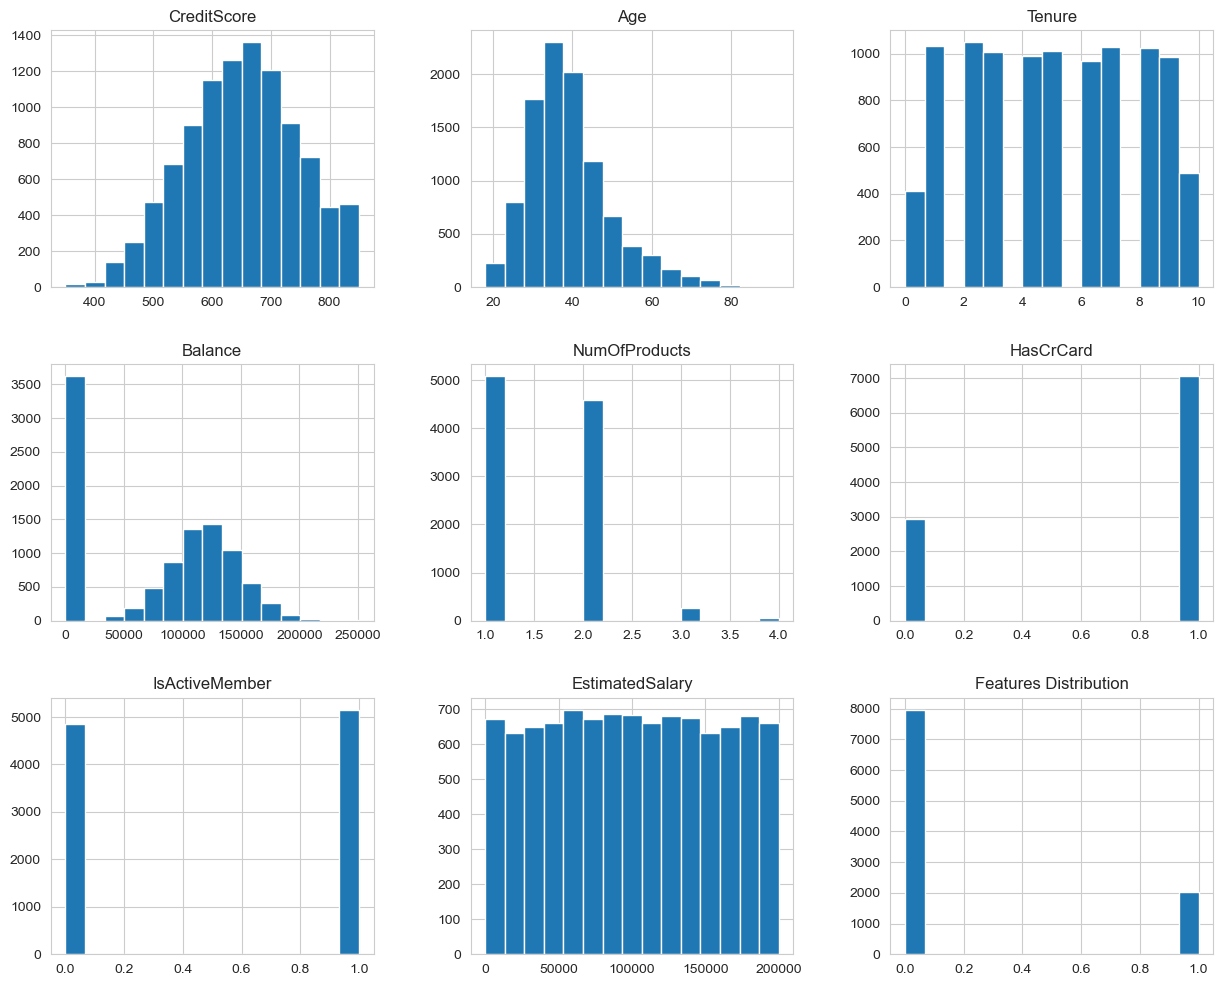

In [23]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.title("Features Distribution")
plt.show()


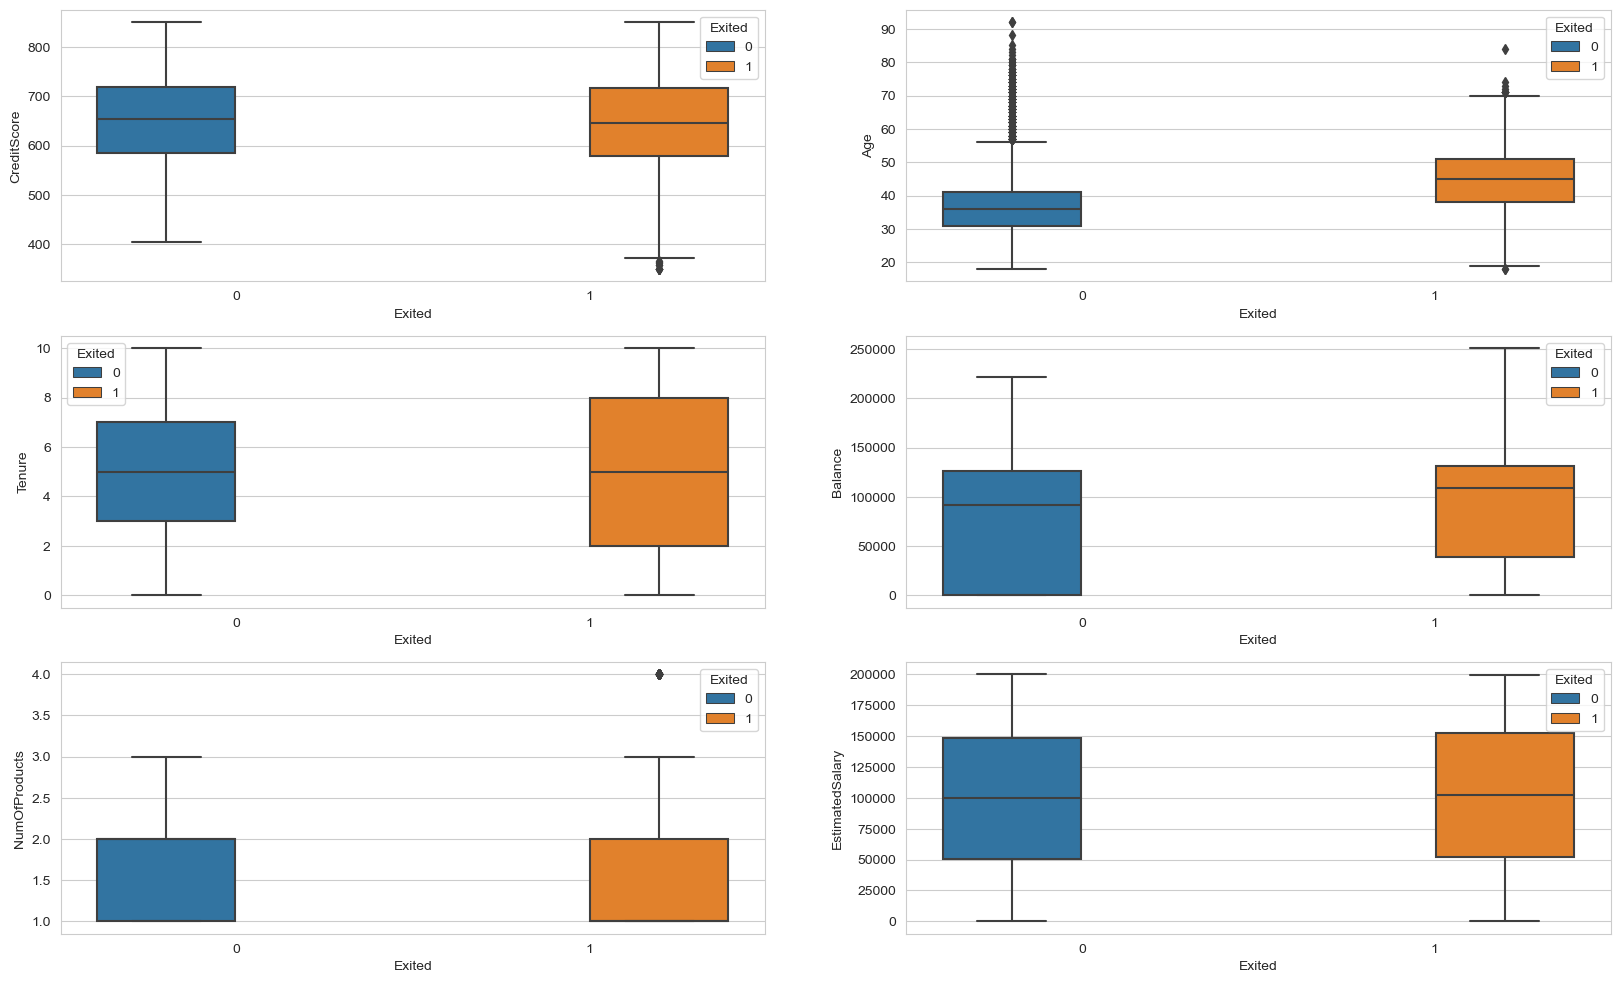

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already imported the necessary libraries and prepared your DataFrame

# Create subplots for boxplots
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))

# Plot boxplots for different continuous attributes based on 'Exited' category
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0, 0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0, 1])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarr[1, 0])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarr[1, 1])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[2, 0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarr[2, 1])

plt.show()

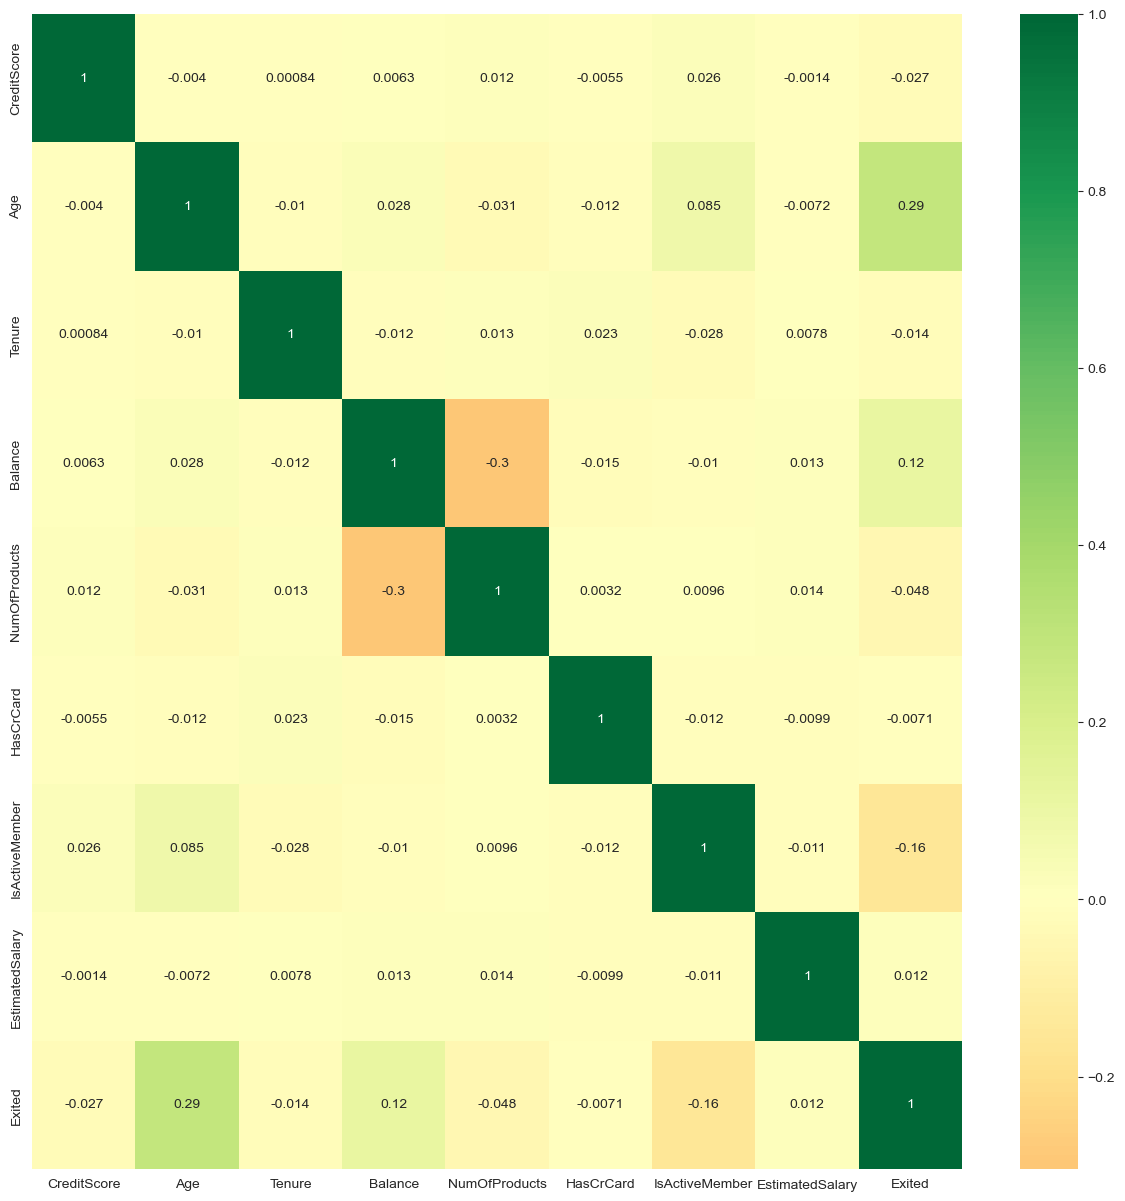

In [25]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0)

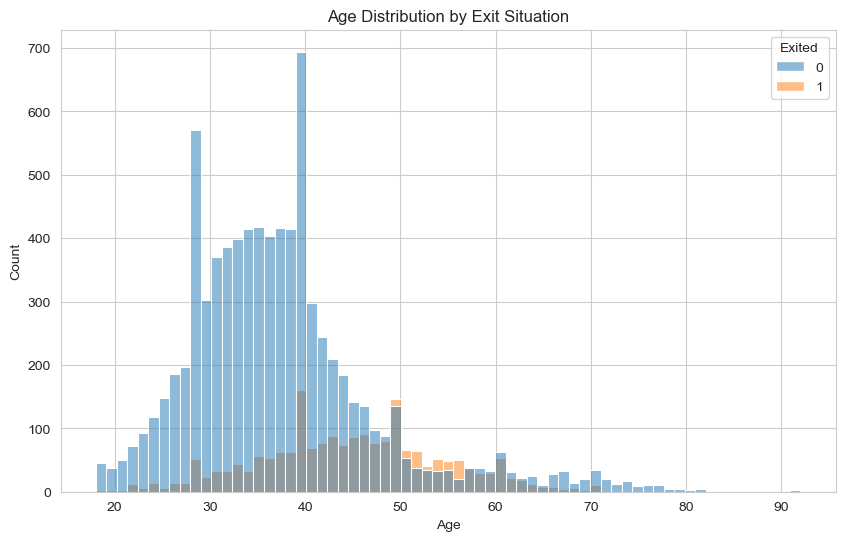

In [26]:
sns.histplot(data = df, x = "Age", hue = "Exited")
plt.title("Age Distribution by Exit Situation");

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [28]:
Geography_df = pd.get_dummies(prefix='Geo',data=df,columns=['Geography'])

In [29]:
Gender_df = Geography_df.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [30]:
df = Gender_df

df = df.astype('int64')
df.info()
df

# Preprocessing of Data
- Train | Test Split, Scalling

In [31]:
X = df.drop(['Exited'],axis=1)
y = df.Exited

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling fitted only to training set to avoid information leakage.
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [34]:
print("Training samples:" , X_train.shape[0])
print("Testing samples:" ,X_test.shape[0])
print("Training sample size:",X_train.shape)
print("Testing sample size:",X_test.shape)

Training samples: 8000
Testing samples: 2000
Training sample size: (8000, 12)
Testing sample size: (2000, 12)


In [35]:
X_test.shape

(2000, 12)

# Modelling & Model Performance

## without class_weigth


Plot the model history to observe the changing of metrics

Make prediction to see "confusion matrix" and "classification report"

Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

### Create The Model

In [36]:
import tensorflow as tf
from tensorflow import keras

# Create a variable to represent the ANN model as an instance
model = keras.Sequential([
    keras.layers.Dense(units=10, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(units=6, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, validation_split=0.15, batch_size=128, epochs=1000, verbose=0)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 203 (812.00 Byte)
Trainable params: 203 (812.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [40]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

63/63 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8595
Test loss: 0.3444696366786957
Test accuracy: 0.859499990940094


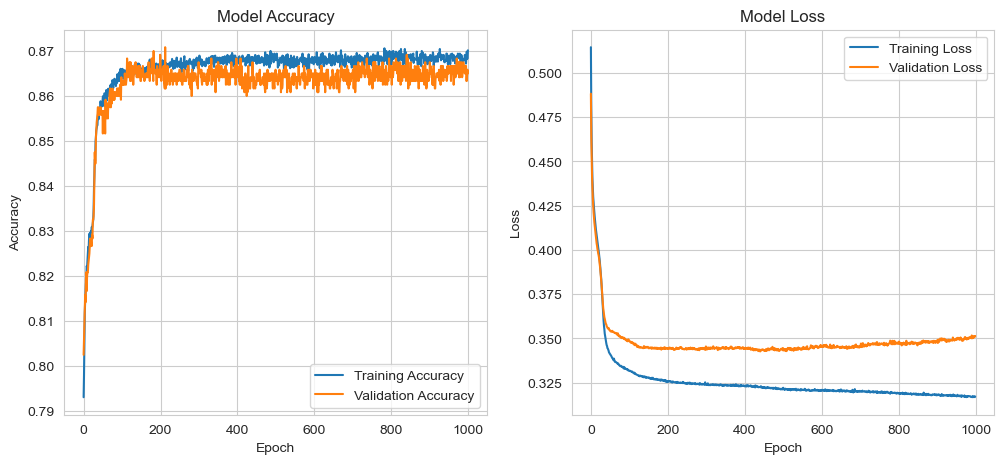

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels (binary classification)
y_pred_class = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Compute the classification report
report = classification_report(y_test, y_pred_class)

# Print or visualize the results
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

63/63 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[1523   72]
 [ 209  196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.73      0.48      0.58       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



63/63 [==============================] - 0s 971us/step


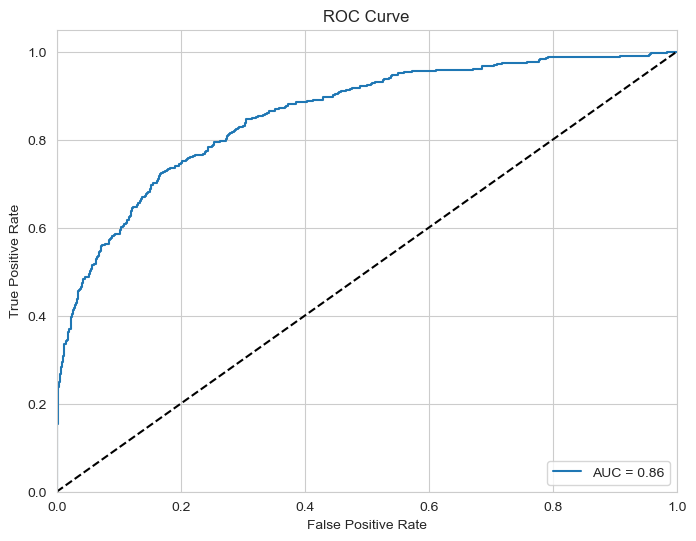

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

63/63 [==============================] - 0s 860us/step


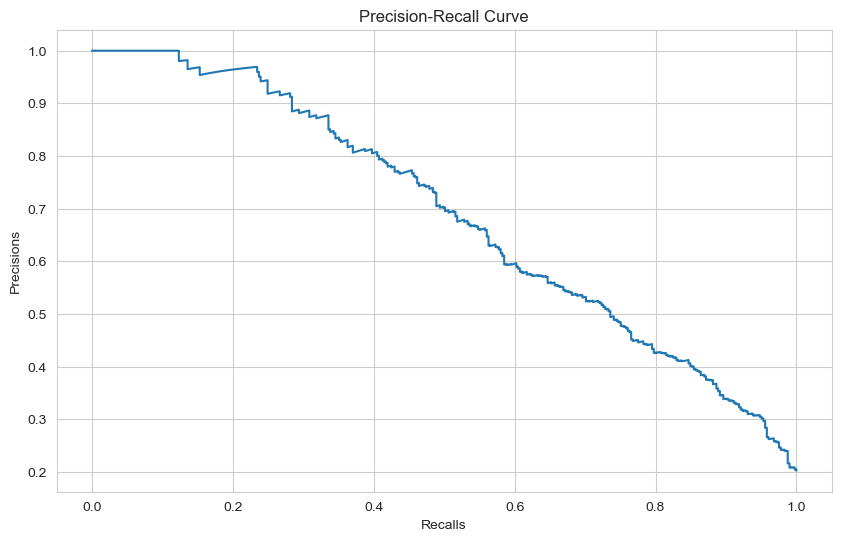

In [44]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [45]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred_proba)
print("Average Precision Score:", average_precision)


Average Precision Score: 0.6888319259401371


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [46]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [48]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train), y = y_train)
class_weights = {0 : class_weights[0], 1 : class_weights[1]}
class_weights
# The number Exited = 0 was 4 times the number Exited = 1, 
# so it gave a low coefficient for 0, gave it 4 times that for 1 and balanced it.

{0: 0.628140703517588, 1: 2.450980392156863}

In [49]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 300, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/300
57/57 [==============================] - 1s 5ms/step - loss: 0.6890 - recall: 0.4939 - val_loss: 0.6809 - val_recall: 0.6463
Epoch 2/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6712 - recall: 0.7704 - val_loss: 0.6675 - val_recall: 0.7683
Epoch 3/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6298 - recall: 0.7738 - val_loss: 0.6403 - val_recall: 0.7927
Epoch 4/300
57/57 [==============================] - 0s 2ms/step - loss: 0.5794 - recall: 0.7827 - val_loss: 0.5795 - val_recall: 0.7622
Epoch 5/300
57/57 [==============================] - 0s 2ms/step - loss: 0.5434 - recall: 0.7602 - val_loss: 0.5410 - val_recall: 0.7439
Epoch 6/300
57/57 [==============================] - 0s 2ms/step - loss: 0.5194 - recall: 0.7609 - val_loss: 0.5282 - val_recall: 0.7561
Epoch 7/300
57/57 [==============================] - 0s 2ms/step - loss: 0.5037 - recall: 0.7514 - val_loss: 0.5071 - val_recall: 0.7500
Epoch 8/300
57/57 [======================

57/57 [==============================] - 0s 2ms/step - loss: 0.4373 - recall: 0.7888 - val_loss: 0.4295 - val_recall: 0.7683
Epoch 61/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4380 - recall: 0.7779 - val_loss: 0.4532 - val_recall: 0.7866
Epoch 62/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4367 - recall: 0.7827 - val_loss: 0.4376 - val_recall: 0.7683
Epoch 63/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4360 - recall: 0.7909 - val_loss: 0.4068 - val_recall: 0.7195
Epoch 64/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4364 - recall: 0.7779 - val_loss: 0.4268 - val_recall: 0.7561
Epoch 65/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4355 - recall: 0.7779 - val_loss: 0.4120 - val_recall: 0.7439
Epoch 66/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4359 - recall: 0.7698 - val_loss: 0.4426 - val_recall: 0.7683
Epoch 67/300
57/57 [===========================

57/57 [==============================] - 0s 2ms/step - loss: 0.4219 - recall: 0.7834 - val_loss: 0.4333 - val_recall: 0.7561
Epoch 120/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4218 - recall: 0.7800 - val_loss: 0.4724 - val_recall: 0.7683
Epoch 121/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4222 - recall: 0.7841 - val_loss: 0.4622 - val_recall: 0.7683
Epoch 122/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4214 - recall: 0.7875 - val_loss: 0.4279 - val_recall: 0.7439
Epoch 123/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4208 - recall: 0.7916 - val_loss: 0.4208 - val_recall: 0.7439
Epoch 124/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4215 - recall: 0.7854 - val_loss: 0.4343 - val_recall: 0.7561
Epoch 125/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4210 - recall: 0.7800 - val_loss: 0.4540 - val_recall: 0.7622
Epoch 126/300
57/57 [====================

57/57 [==============================] - 0s 2ms/step - loss: 0.4118 - recall: 0.7861 - val_loss: 0.4529 - val_recall: 0.7439
Epoch 179/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4125 - recall: 0.7807 - val_loss: 0.4321 - val_recall: 0.7439
Epoch 180/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4128 - recall: 0.7875 - val_loss: 0.4371 - val_recall: 0.7439
Epoch 181/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4131 - recall: 0.7841 - val_loss: 0.4578 - val_recall: 0.7500
Epoch 182/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4120 - recall: 0.7881 - val_loss: 0.4444 - val_recall: 0.7439
Epoch 183/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4115 - recall: 0.7841 - val_loss: 0.4569 - val_recall: 0.7439
Epoch 184/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4115 - recall: 0.7936 - val_loss: 0.4644 - val_recall: 0.7683
Epoch 185/300
57/57 [====================

57/57 [==============================] - 0s 2ms/step - loss: 0.4057 - recall: 0.7990 - val_loss: 0.4303 - val_recall: 0.7439
Epoch 238/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4054 - recall: 0.7970 - val_loss: 0.4399 - val_recall: 0.7561
Epoch 239/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4060 - recall: 0.7963 - val_loss: 0.4816 - val_recall: 0.7683
Epoch 240/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4044 - recall: 0.8045 - val_loss: 0.4411 - val_recall: 0.7622
Epoch 241/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4049 - recall: 0.7956 - val_loss: 0.4329 - val_recall: 0.7500
Epoch 242/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4052 - recall: 0.7888 - val_loss: 0.4735 - val_recall: 0.7744
Epoch 243/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4051 - recall: 0.7990 - val_loss: 0.4514 - val_recall: 0.7622
Epoch 244/300
57/57 [====================

57/57 [==============================] - 0s 2ms/step - loss: 0.4010 - recall: 0.8059 - val_loss: 0.4617 - val_recall: 0.7561
Epoch 297/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4008 - recall: 0.8127 - val_loss: 0.4607 - val_recall: 0.7500
Epoch 298/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4009 - recall: 0.8079 - val_loss: 0.4433 - val_recall: 0.7500
Epoch 299/300
57/57 [==============================] - 0s 2ms/step - loss: 0.4000 - recall: 0.8025 - val_loss: 0.4483 - val_recall: 0.7561
Epoch 300/300
57/57 [==============================] - 0s 2ms/step - loss: 0.3995 - recall: 0.8031 - val_loss: 0.4509 - val_recall: 0.7500


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

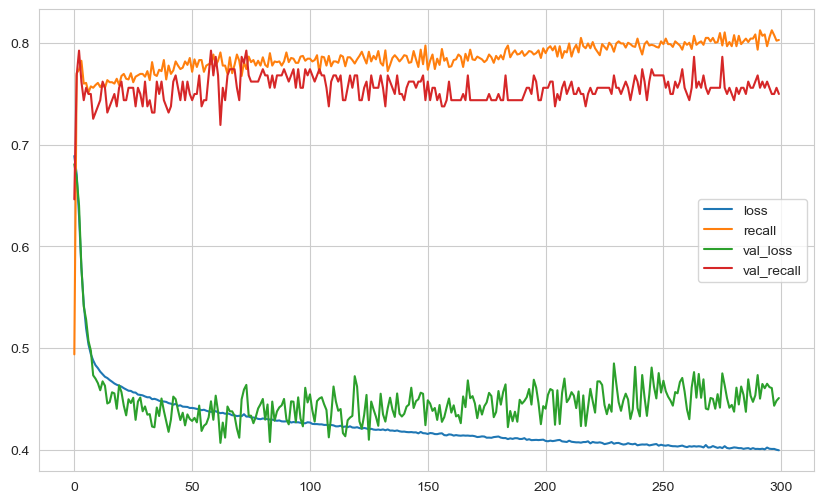

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [51]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# The recall scores we received using class-weight were healthier. Of course, this time precision scores dropped.

63/63 [==============================] - 0s 991us/step
[[1231  364]
 [  94  311]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1595
           1       0.46      0.77      0.58       405

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



63/63 [==============================] - 0s 932us/step


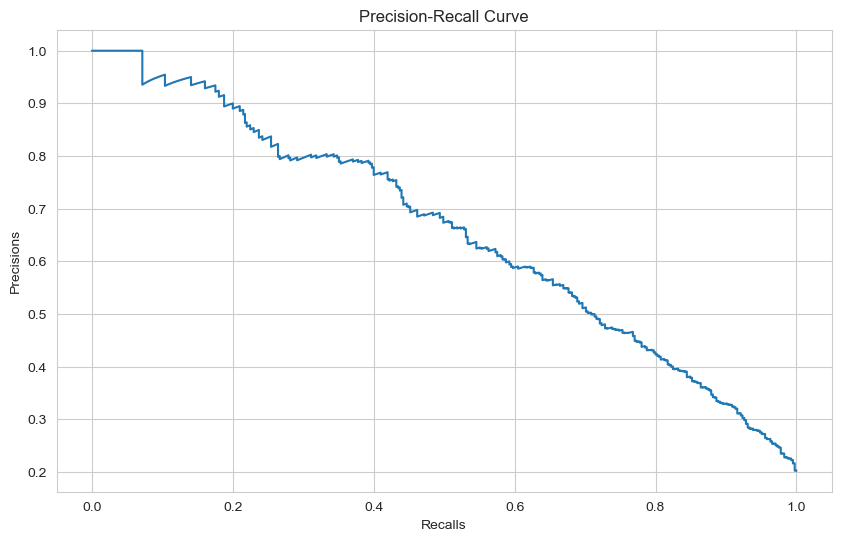

In [52]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [53]:
average_precision_score(y_test, y_pred_proba)

0.6577775804902488

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [54]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [55]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 1000, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/1000
57/57 [==============================] - 1s 4ms/step - loss: 0.6714 - recall: 0.4734 - val_loss: 0.5751 - val_recall: 0.7988
Epoch 2/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.6014 - recall: 0.7377 - val_loss: 0.4598 - val_recall: 0.7073
Epoch 3/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5607 - recall: 0.7575 - val_loss: 0.4710 - val_recall: 0.7683
Epoch 4/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5319 - recall: 0.7793 - val_loss: 0.4290 - val_recall: 0.7317
Epoch 5/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5158 - recall: 0.7711 - val_loss: 0.4732 - val_recall: 0.8110
Epoch 6/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5041 - recall: 0.7800 - val_loss: 0.4545 - val_recall: 0.7988
Epoch 7/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4993 - recall: 0.7575 - val_loss: 0.4408 - val_recall: 0.7744
Epoch 8/1000
57/57 [==============

57/57 [==============================] - 0s 2ms/step - loss: 0.4166 - recall: 0.7970 - val_loss: 0.4022 - val_recall: 0.7317
Epoch 61/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4243 - recall: 0.7875 - val_loss: 0.4305 - val_recall: 0.7744
Epoch 62/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4210 - recall: 0.7875 - val_loss: 0.4466 - val_recall: 0.7866
Epoch 63/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4176 - recall: 0.7970 - val_loss: 0.3796 - val_recall: 0.7195
Epoch 64/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4205 - recall: 0.7861 - val_loss: 0.3933 - val_recall: 0.7317
Epoch 65/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4148 - recall: 0.7861 - val_loss: 0.3884 - val_recall: 0.7195
Epoch 66/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4169 - recall: 0.7902 - val_loss: 0.4246 - val_recall: 0.7500
Epoch 67/1000
57/57 [====================

Epoch 119/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4026 - recall: 0.7943 - val_loss: 0.4731 - val_recall: 0.7927
Epoch 120/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4039 - recall: 0.8161 - val_loss: 0.4595 - val_recall: 0.7805
Epoch 121/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4059 - recall: 0.8099 - val_loss: 0.4906 - val_recall: 0.8171
Epoch 122/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4087 - recall: 0.7895 - val_loss: 0.4424 - val_recall: 0.7683
Epoch 123/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4040 - recall: 0.7984 - val_loss: 0.4328 - val_recall: 0.7683
Epoch 124/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4017 - recall: 0.8011 - val_loss: 0.4071 - val_recall: 0.7195
Epoch 125/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4063 - recall: 0.8093 - val_loss: 0.4365 - val_recall: 0.7988
Epoch 126/1000
57/57

57/57 [==============================] - 0s 2ms/step - loss: 0.3976 - recall: 0.8140 - val_loss: 0.4117 - val_recall: 0.7195
Epoch 178/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3989 - recall: 0.8099 - val_loss: 0.4264 - val_recall: 0.7317
Epoch 179/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4006 - recall: 0.7997 - val_loss: 0.4586 - val_recall: 0.7439
Epoch 180/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4022 - recall: 0.8215 - val_loss: 0.4131 - val_recall: 0.6890
Epoch 181/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4049 - recall: 0.8065 - val_loss: 0.4241 - val_recall: 0.7256
Epoch 182/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3983 - recall: 0.8011 - val_loss: 0.4249 - val_recall: 0.7256
Epoch 183/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3995 - recall: 0.8045 - val_loss: 0.4277 - val_recall: 0.7195
Epoch 184/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3939 - recall: 0.8120 - val_loss: 0.4341 - val_recall: 0.7134
Epoch 236/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3964 - recall: 0.8202 - val_loss: 0.4272 - val_recall: 0.7195
Epoch 237/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3949 - recall: 0.8168 - val_loss: 0.4302 - val_recall: 0.7317
Epoch 238/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3940 - recall: 0.8099 - val_loss: 0.4444 - val_recall: 0.7317
Epoch 239/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3934 - recall: 0.8147 - val_loss: 0.4294 - val_recall: 0.7195
Epoch 240/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3929 - recall: 0.8065 - val_loss: 0.4221 - val_recall: 0.7134
Epoch 241/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3936 - recall: 0.8127 - val_loss: 0.4307 - val_recall: 0.7256
Epoch 242/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3974 - recall: 0.8317 - val_loss: 0.4131 - val_recall: 0.7073
Epoch 294/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3934 - recall: 0.8161 - val_loss: 0.4436 - val_recall: 0.7378
Epoch 295/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3935 - recall: 0.8202 - val_loss: 0.4344 - val_recall: 0.7256
Epoch 296/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3889 - recall: 0.8188 - val_loss: 0.4519 - val_recall: 0.7378
Epoch 297/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3899 - recall: 0.8215 - val_loss: 0.4714 - val_recall: 0.7378
Epoch 298/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3945 - recall: 0.8277 - val_loss: 0.4270 - val_recall: 0.7073
Epoch 299/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3929 - recall: 0.8277 - val_loss: 0.4201 - val_recall: 0.7256
Epoch 300/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3931 - recall: 0.8120 - val_loss: 0.4778 - val_recall: 0.7561
Epoch 352/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3907 - recall: 0.8270 - val_loss: 0.4656 - val_recall: 0.7256
Epoch 353/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3896 - recall: 0.8140 - val_loss: 0.4451 - val_recall: 0.7012
Epoch 354/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3894 - recall: 0.8277 - val_loss: 0.4631 - val_recall: 0.7317
Epoch 355/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3870 - recall: 0.8215 - val_loss: 0.4192 - val_recall: 0.6829
Epoch 356/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3881 - recall: 0.8283 - val_loss: 0.4097 - val_recall: 0.6951
Epoch 357/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3880 - recall: 0.8161 - val_loss: 0.4717 - val_recall: 0.7500
Epoch 358/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3848 - recall: 0.8127 - val_loss: 0.4704 - val_recall: 0.7439
Epoch 410/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3867 - recall: 0.8243 - val_loss: 0.4475 - val_recall: 0.7134
Epoch 411/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3837 - recall: 0.8256 - val_loss: 0.4320 - val_recall: 0.7012
Epoch 412/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3844 - recall: 0.8256 - val_loss: 0.4933 - val_recall: 0.7561
Epoch 413/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3873 - recall: 0.8324 - val_loss: 0.4494 - val_recall: 0.7073
Epoch 414/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3859 - recall: 0.8202 - val_loss: 0.4652 - val_recall: 0.7256
Epoch 415/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3850 - recall: 0.8317 - val_loss: 0.4495 - val_recall: 0.7073
Epoch 416/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3851 - recall: 0.8249 - val_loss: 0.4451 - val_recall: 0.7012
Epoch 468/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3813 - recall: 0.8236 - val_loss: 0.4745 - val_recall: 0.7378
Epoch 469/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3848 - recall: 0.8304 - val_loss: 0.4528 - val_recall: 0.7195
Epoch 470/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3836 - recall: 0.8202 - val_loss: 0.4781 - val_recall: 0.7317
Epoch 471/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3874 - recall: 0.8249 - val_loss: 0.4627 - val_recall: 0.7195
Epoch 472/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3869 - recall: 0.8297 - val_loss: 0.4843 - val_recall: 0.7439
Epoch 473/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3821 - recall: 0.8277 - val_loss: 0.4505 - val_recall: 0.7073
Epoch 474/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3793 - recall: 0.8283 - val_loss: 0.4378 - val_recall: 0.7012
Epoch 526/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3819 - recall: 0.8168 - val_loss: 0.4658 - val_recall: 0.7256
Epoch 527/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3811 - recall: 0.8338 - val_loss: 0.4408 - val_recall: 0.7073
Epoch 528/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3806 - recall: 0.8202 - val_loss: 0.4791 - val_recall: 0.7134
Epoch 529/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3841 - recall: 0.8290 - val_loss: 0.4602 - val_recall: 0.7378
Epoch 530/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3888 - recall: 0.8297 - val_loss: 0.4275 - val_recall: 0.6768
Epoch 531/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3853 - recall: 0.8188 - val_loss: 0.4687 - val_recall: 0.7378
Epoch 532/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3810 - recall: 0.8222 - val_loss: 0.4699 - val_recall: 0.7317
Epoch 584/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3785 - recall: 0.8249 - val_loss: 0.4716 - val_recall: 0.7378
Epoch 585/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3771 - recall: 0.8331 - val_loss: 0.4406 - val_recall: 0.6951
Epoch 586/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3826 - recall: 0.8270 - val_loss: 0.4366 - val_recall: 0.6768
Epoch 587/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3781 - recall: 0.8311 - val_loss: 0.4891 - val_recall: 0.7622
Epoch 588/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3799 - recall: 0.8290 - val_loss: 0.4595 - val_recall: 0.7256
Epoch 589/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3802 - recall: 0.8290 - val_loss: 0.4704 - val_recall: 0.7378
Epoch 590/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3777 - recall: 0.8331 - val_loss: 0.4586 - val_recall: 0.7012
Epoch 642/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3756 - recall: 0.8229 - val_loss: 0.4566 - val_recall: 0.6890
Epoch 643/1000
57/57 [==============================] - 0s 1ms/step - loss: 0.3754 - recall: 0.8331 - val_loss: 0.4586 - val_recall: 0.7317
Epoch 644/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3778 - recall: 0.8263 - val_loss: 0.4680 - val_recall: 0.7256
Epoch 645/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3780 - recall: 0.8317 - val_loss: 0.4335 - val_recall: 0.6829
Epoch 646/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3756 - recall: 0.8351 - val_loss: 0.4277 - val_recall: 0.6707
Epoch 647/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3769 - recall: 0.8304 - val_loss: 0.4750 - val_recall: 0.7561
Epoch 648/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3756 - recall: 0.8345 - val_loss: 0.4729 - val_recall: 0.7134
Epoch 700/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3736 - recall: 0.8365 - val_loss: 0.4450 - val_recall: 0.6829
Epoch 701/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3775 - recall: 0.8297 - val_loss: 0.4716 - val_recall: 0.7256
Epoch 702/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3766 - recall: 0.8386 - val_loss: 0.4480 - val_recall: 0.6829
Epoch 703/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3745 - recall: 0.8311 - val_loss: 0.4723 - val_recall: 0.7317
Epoch 704/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3754 - recall: 0.8351 - val_loss: 0.4851 - val_recall: 0.7561
Epoch 705/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3764 - recall: 0.8392 - val_loss: 0.4698 - val_recall: 0.7256
Epoch 706/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3764 - recall: 0.8399 - val_loss: 0.4855 - val_recall: 0.7378
Epoch 758/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3763 - recall: 0.8331 - val_loss: 0.4755 - val_recall: 0.7317
Epoch 759/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3762 - recall: 0.8277 - val_loss: 0.4875 - val_recall: 0.7317
Epoch 760/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3729 - recall: 0.8358 - val_loss: 0.4592 - val_recall: 0.7317
Epoch 761/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3739 - recall: 0.8392 - val_loss: 0.4654 - val_recall: 0.7439
Epoch 762/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3725 - recall: 0.8331 - val_loss: 0.5054 - val_recall: 0.7500
Epoch 763/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3744 - recall: 0.8372 - val_loss: 0.4700 - val_recall: 0.7256
Epoch 764/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3738 - recall: 0.8426 - val_loss: 0.4634 - val_recall: 0.7134
Epoch 816/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3723 - recall: 0.8433 - val_loss: 0.4873 - val_recall: 0.7439
Epoch 817/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3738 - recall: 0.8358 - val_loss: 0.4465 - val_recall: 0.7012
Epoch 818/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3749 - recall: 0.8324 - val_loss: 0.4299 - val_recall: 0.6646
Epoch 819/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3734 - recall: 0.8290 - val_loss: 0.4886 - val_recall: 0.7500
Epoch 820/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3737 - recall: 0.8440 - val_loss: 0.4487 - val_recall: 0.6951
Epoch 821/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3770 - recall: 0.8317 - val_loss: 0.5062 - val_recall: 0.7561
Epoch 822/1000
57/57 [=============

57/57 [==============================] - 0s 3ms/step - loss: 0.3735 - recall: 0.8379 - val_loss: 0.4457 - val_recall: 0.6890
Epoch 874/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3776 - recall: 0.8358 - val_loss: 0.5250 - val_recall: 0.7805
Epoch 875/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3730 - recall: 0.8460 - val_loss: 0.4329 - val_recall: 0.6707
Epoch 876/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3720 - recall: 0.8433 - val_loss: 0.4562 - val_recall: 0.7012
Epoch 877/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3721 - recall: 0.8454 - val_loss: 0.4632 - val_recall: 0.7073
Epoch 878/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3769 - recall: 0.8372 - val_loss: 0.4400 - val_recall: 0.6829
Epoch 879/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.3712 - recall: 0.8433 - val_loss: 0.4596 - val_recall: 0.7134
Epoch 880/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3703 - recall: 0.8440 - val_loss: 0.4633 - val_recall: 0.6829
Epoch 932/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3747 - recall: 0.8426 - val_loss: 0.4894 - val_recall: 0.7378
Epoch 933/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3705 - recall: 0.8488 - val_loss: 0.4492 - val_recall: 0.6890
Epoch 934/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.3725 - recall: 0.8379 - val_loss: 0.4385 - val_recall: 0.6890
Epoch 935/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3710 - recall: 0.8379 - val_loss: 0.4751 - val_recall: 0.7256
Epoch 936/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.3721 - recall: 0.8413 - val_loss: 0.4498 - val_recall: 0.6768
Epoch 937/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3718 - recall: 0.8495 - val_loss: 0.4823 - val_recall: 0.7256
Epoch 938/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.3695 - recall: 0.8447 - val_loss: 0.4514 - val_recall: 0.6890
Epoch 990/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3690 - recall: 0.8433 - val_loss: 0.4457 - val_recall: 0.7012
Epoch 991/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3682 - recall: 0.8426 - val_loss: 0.4808 - val_recall: 0.7195
Epoch 992/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3721 - recall: 0.8406 - val_loss: 0.4410 - val_recall: 0.6890
Epoch 993/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3731 - recall: 0.8331 - val_loss: 0.4289 - val_recall: 0.6829
Epoch 994/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3734 - recall: 0.8426 - val_loss: 0.4738 - val_recall: 0.7073
Epoch 995/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3699 - recall: 0.8399 - val_loss: 0.4862 - val_recall: 0.7317
Epoch 996/1000
57/57 [=============

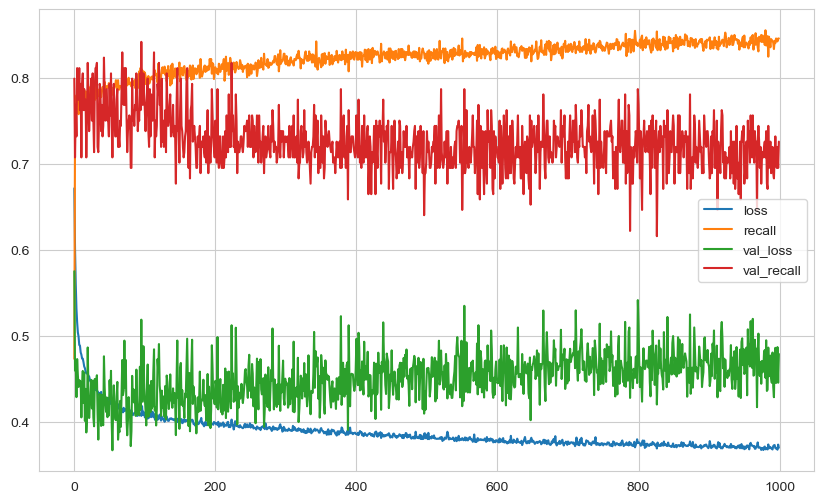

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();
# By looking I see overfitting.
# To prevent this, we can add dropout or early_stop.

In [57]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 936us/step
[[1199  396]
 [  96  309]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1595
           1       0.44      0.76      0.56       405

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000



### Add Dropout Layer

In [58]:
from tensorflow.keras.layers import Dropout

tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.2)) # You can adjust the dropout rate as needed
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)  # Use 'learning_rate' instead of 'lr'
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])


In [59]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 400, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/400
57/57 [==============================] - 1s 5ms/step - loss: 0.7032 - recall: 0.4898 - val_loss: 0.6319 - val_recall: 0.5854
Epoch 2/400
57/57 [==============================] - 0s 3ms/step - loss: 0.6289 - recall: 0.6117 - val_loss: 0.5878 - val_recall: 0.6280
Epoch 3/400
57/57 [==============================] - 0s 3ms/step - loss: 0.6076 - recall: 0.6056 - val_loss: 0.5800 - val_recall: 0.6951
Epoch 4/400
57/57 [==============================] - 0s 3ms/step - loss: 0.5812 - recall: 0.6574 - val_loss: 0.5248 - val_recall: 0.7439
Epoch 5/400
57/57 [==============================] - 0s 3ms/step - loss: 0.5697 - recall: 0.6696 - val_loss: 0.4958 - val_recall: 0.7622
Epoch 6/400
57/57 [==============================] - 0s 3ms/step - loss: 0.5491 - recall: 0.6655 - val_loss: 0.4874 - val_recall: 0.7805
Epoch 7/400
57/57 [==============================] - 0s 3ms/step - loss: 0.5424 - recall: 0.6424 - val_loss: 0.4635 - val_recall: 0.7805
Epoch 8/400
57/57 [======================

57/57 [==============================] - 0s 2ms/step - loss: 0.4860 - recall: 0.7289 - val_loss: 0.4071 - val_recall: 0.7805
Epoch 61/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4870 - recall: 0.7282 - val_loss: 0.4625 - val_recall: 0.7805
Epoch 62/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4920 - recall: 0.7037 - val_loss: 0.4259 - val_recall: 0.7622
Epoch 63/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4853 - recall: 0.7200 - val_loss: 0.3989 - val_recall: 0.7561
Epoch 64/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4802 - recall: 0.7391 - val_loss: 0.4115 - val_recall: 0.7622
Epoch 65/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4903 - recall: 0.7296 - val_loss: 0.4120 - val_recall: 0.7683
Epoch 66/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4895 - recall: 0.7364 - val_loss: 0.4389 - val_recall: 0.7683
Epoch 67/400
57/57 [===========================

57/57 [==============================] - 0s 2ms/step - loss: 0.4828 - recall: 0.7377 - val_loss: 0.4160 - val_recall: 0.7195
Epoch 120/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4762 - recall: 0.7343 - val_loss: 0.4327 - val_recall: 0.8171
Epoch 121/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4785 - recall: 0.7282 - val_loss: 0.4245 - val_recall: 0.7439
Epoch 122/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4866 - recall: 0.7255 - val_loss: 0.4127 - val_recall: 0.7073
Epoch 123/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4873 - recall: 0.7296 - val_loss: 0.4120 - val_recall: 0.7988
Epoch 124/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4759 - recall: 0.7323 - val_loss: 0.4116 - val_recall: 0.7866
Epoch 125/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4780 - recall: 0.7262 - val_loss: 0.4259 - val_recall: 0.7988
Epoch 126/400
57/57 [====================

57/57 [==============================] - 0s 2ms/step - loss: 0.4812 - recall: 0.7302 - val_loss: 0.4293 - val_recall: 0.7988
Epoch 179/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4761 - recall: 0.7636 - val_loss: 0.4146 - val_recall: 0.7744
Epoch 180/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4762 - recall: 0.7357 - val_loss: 0.4247 - val_recall: 0.7744
Epoch 181/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4722 - recall: 0.7568 - val_loss: 0.4232 - val_recall: 0.7805
Epoch 182/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4867 - recall: 0.7371 - val_loss: 0.4323 - val_recall: 0.7805
Epoch 183/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4771 - recall: 0.7316 - val_loss: 0.4263 - val_recall: 0.7866
Epoch 184/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4842 - recall: 0.7282 - val_loss: 0.4178 - val_recall: 0.7683
Epoch 185/400
57/57 [====================

57/57 [==============================] - 0s 2ms/step - loss: 0.4709 - recall: 0.7595 - val_loss: 0.4144 - val_recall: 0.7622
Epoch 238/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4778 - recall: 0.7425 - val_loss: 0.4000 - val_recall: 0.7622
Epoch 239/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4756 - recall: 0.7234 - val_loss: 0.4283 - val_recall: 0.7866
Epoch 240/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4783 - recall: 0.7595 - val_loss: 0.4282 - val_recall: 0.7988
Epoch 241/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4715 - recall: 0.7657 - val_loss: 0.4008 - val_recall: 0.7683
Epoch 242/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4741 - recall: 0.7500 - val_loss: 0.4162 - val_recall: 0.7927
Epoch 243/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4735 - recall: 0.7398 - val_loss: 0.4168 - val_recall: 0.7866
Epoch 244/400
57/57 [====================

57/57 [==============================] - 0s 2ms/step - loss: 0.4792 - recall: 0.7459 - val_loss: 0.4215 - val_recall: 0.8171
Epoch 297/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4712 - recall: 0.7575 - val_loss: 0.4313 - val_recall: 0.8171
Epoch 298/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4702 - recall: 0.7813 - val_loss: 0.4197 - val_recall: 0.8110
Epoch 299/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4751 - recall: 0.7527 - val_loss: 0.4141 - val_recall: 0.8110
Epoch 300/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4849 - recall: 0.7493 - val_loss: 0.4232 - val_recall: 0.7988
Epoch 301/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4693 - recall: 0.7623 - val_loss: 0.4364 - val_recall: 0.8110
Epoch 302/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4679 - recall: 0.7827 - val_loss: 0.3966 - val_recall: 0.8049
Epoch 303/400
57/57 [====================

57/57 [==============================] - 0s 3ms/step - loss: 0.4686 - recall: 0.7636 - val_loss: 0.4044 - val_recall: 0.7744
Epoch 356/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4760 - recall: 0.7575 - val_loss: 0.4162 - val_recall: 0.8110
Epoch 357/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4676 - recall: 0.7745 - val_loss: 0.4214 - val_recall: 0.8171
Epoch 358/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4701 - recall: 0.7384 - val_loss: 0.4173 - val_recall: 0.7927
Epoch 359/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4708 - recall: 0.7568 - val_loss: 0.4170 - val_recall: 0.8110
Epoch 360/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4698 - recall: 0.7568 - val_loss: 0.4210 - val_recall: 0.7927
Epoch 361/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4703 - recall: 0.7548 - val_loss: 0.4126 - val_recall: 0.8110
Epoch 362/400
57/57 [====================

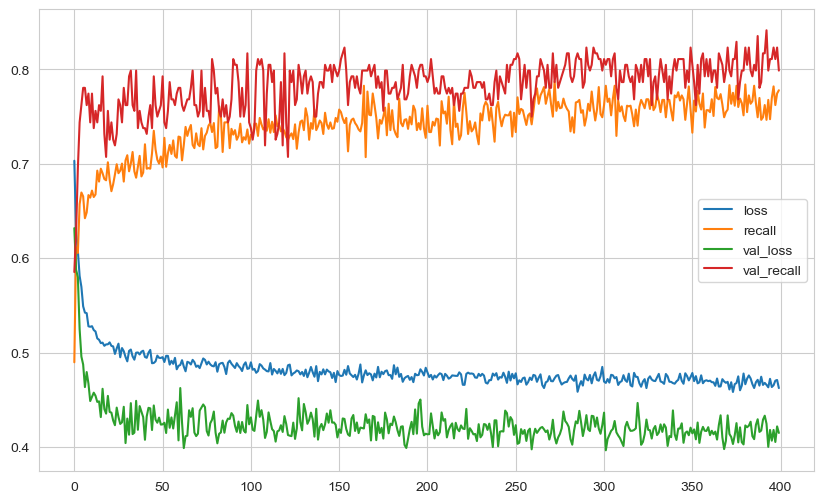

In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [61]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# When we used Dropout, our score improved and we got rid of overfitting.

63/63 [==============================] - 0s 785us/step
[[1222  373]
 [  86  319]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1595
           1       0.46      0.79      0.58       405

    accuracy                           0.77      2000
   macro avg       0.70      0.78      0.71      2000
weighted avg       0.84      0.77      0.79      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [62]:
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.2))  # You can adjust the dropout rate as needed
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)  # Use 'learning_rate' instead of 'lr'
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 100, restore_best_weights = True)

In [64]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 400, 
          verbose = 1, 
          class_weight = class_weights,
          callbacks = [early_stop])

Epoch 1/400
57/57 [==============================] - 1s 8ms/step - loss: 0.6966 - recall: 0.1649 - val_loss: 0.6839 - val_recall: 0.1829
Epoch 2/400
57/57 [==============================] - 0s 3ms/step - loss: 0.6791 - recall: 0.3958 - val_loss: 0.6160 - val_recall: 0.5366
Epoch 3/400
57/57 [==============================] - 0s 4ms/step - loss: 0.6389 - recall: 0.4768 - val_loss: 0.5929 - val_recall: 0.7195
Epoch 4/400
57/57 [==============================] - 0s 3ms/step - loss: 0.6085 - recall: 0.6219 - val_loss: 0.5650 - val_recall: 0.7195
Epoch 5/400
57/57 [==============================] - 0s 3ms/step - loss: 0.5973 - recall: 0.6294 - val_loss: 0.5460 - val_recall: 0.7439
Epoch 6/400
57/57 [==============================] - 0s 3ms/step - loss: 0.5837 - recall: 0.6492 - val_loss: 0.5295 - val_recall: 0.7378
Epoch 7/400
57/57 [==============================] - 0s 4ms/step - loss: 0.5644 - recall: 0.6723 - val_loss: 0.5048 - val_recall: 0.7622
Epoch 8/400
57/57 [======================

57/57 [==============================] - 0s 2ms/step - loss: 0.4845 - recall: 0.7466 - val_loss: 0.4254 - val_recall: 0.7805
Epoch 61/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4914 - recall: 0.7302 - val_loss: 0.4762 - val_recall: 0.8171
Epoch 62/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4948 - recall: 0.7316 - val_loss: 0.4187 - val_recall: 0.7988
Epoch 63/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4882 - recall: 0.7200 - val_loss: 0.4076 - val_recall: 0.7927
Epoch 64/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4814 - recall: 0.7343 - val_loss: 0.4156 - val_recall: 0.7866
Epoch 65/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4885 - recall: 0.7350 - val_loss: 0.4257 - val_recall: 0.8049
Epoch 66/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4883 - recall: 0.7323 - val_loss: 0.4296 - val_recall: 0.7988
Epoch 67/400
57/57 [===========================

57/57 [==============================] - 0s 2ms/step - loss: 0.4802 - recall: 0.7425 - val_loss: 0.4222 - val_recall: 0.7561
Epoch 120/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4783 - recall: 0.7214 - val_loss: 0.4480 - val_recall: 0.8110
Epoch 121/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4811 - recall: 0.7377 - val_loss: 0.4298 - val_recall: 0.7988
Epoch 122/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4883 - recall: 0.7193 - val_loss: 0.4238 - val_recall: 0.7744
Epoch 123/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4775 - recall: 0.7289 - val_loss: 0.4282 - val_recall: 0.7866
Epoch 124/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4713 - recall: 0.7425 - val_loss: 0.4170 - val_recall: 0.7744
Epoch 125/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4767 - recall: 0.7296 - val_loss: 0.4234 - val_recall: 0.7805
Epoch 126/400
57/57 [====================

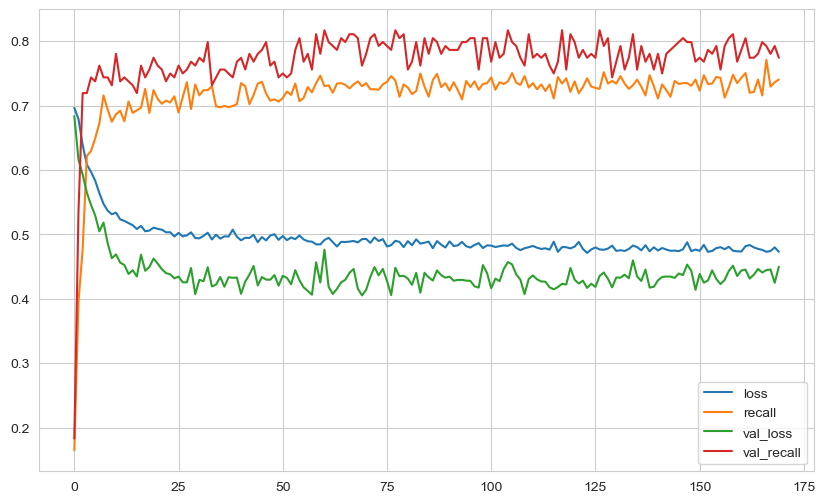

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [66]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 764us/step
[[1263  332]
 [  94  311]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1595
           1       0.48      0.77      0.59       405

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000



#### Monitor the "val_recall" as metric

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)  # Use 'learning_rate' instead of 'lr'
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# If we set metrics to accuracy here, we could also look at val_accuracy as a monitor.
# Since we have selected recall as metrics here, we will also select val_recall as monitor.

In [68]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 200, restore_best_weights = True)
# I want to maximize the recall value, we wrote mode = "max".

In [69]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 1000, 
          verbose = 1, 
          class_weight = class_weights,
          callbacks = [early_stop])

Epoch 1/1000
57/57 [==============================] - 1s 4ms/step - loss: 0.6732 - recall: 0.6403 - val_loss: 0.6599 - val_recall: 0.7073
Epoch 2/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.6347 - recall: 0.5681 - val_loss: 0.6113 - val_recall: 0.7012
Epoch 3/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5947 - recall: 0.6178 - val_loss: 0.5716 - val_recall: 0.7012
Epoch 4/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5731 - recall: 0.6383 - val_loss: 0.5300 - val_recall: 0.6768
Epoch 5/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5617 - recall: 0.6192 - val_loss: 0.4993 - val_recall: 0.6341
Epoch 6/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5533 - recall: 0.6131 - val_loss: 0.5102 - val_recall: 0.6890
Epoch 7/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5442 - recall: 0.6247 - val_loss: 0.4992 - val_recall: 0.7012
Epoch 8/1000
57/57 [==============

57/57 [==============================] - 0s 2ms/step - loss: 0.5077 - recall: 0.6683 - val_loss: 0.4195 - val_recall: 0.7073
Epoch 61/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5011 - recall: 0.6642 - val_loss: 0.4395 - val_recall: 0.7317
Epoch 62/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5103 - recall: 0.6505 - val_loss: 0.4347 - val_recall: 0.7195
Epoch 63/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4947 - recall: 0.6839 - val_loss: 0.4277 - val_recall: 0.6829
Epoch 64/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5046 - recall: 0.6696 - val_loss: 0.4386 - val_recall: 0.7195
Epoch 65/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4993 - recall: 0.6826 - val_loss: 0.4102 - val_recall: 0.6646
Epoch 66/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.5008 - recall: 0.6594 - val_loss: 0.4388 - val_recall: 0.7256
Epoch 67/1000
57/57 [====================

Epoch 119/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4900 - recall: 0.6907 - val_loss: 0.4145 - val_recall: 0.6890
Epoch 120/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4976 - recall: 0.6723 - val_loss: 0.4362 - val_recall: 0.7195
Epoch 121/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4892 - recall: 0.6853 - val_loss: 0.4342 - val_recall: 0.7195
Epoch 122/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4987 - recall: 0.6785 - val_loss: 0.4201 - val_recall: 0.6890
Epoch 123/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4940 - recall: 0.6860 - val_loss: 0.4144 - val_recall: 0.6707
Epoch 124/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4917 - recall: 0.6771 - val_loss: 0.4177 - val_recall: 0.6890
Epoch 125/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4936 - recall: 0.6723 - val_loss: 0.4287 - val_recall: 0.6951
Epoch 126/1000
57/57

57/57 [==============================] - 0s 2ms/step - loss: 0.4911 - recall: 0.6826 - val_loss: 0.4388 - val_recall: 0.7195
Epoch 178/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4837 - recall: 0.6880 - val_loss: 0.4252 - val_recall: 0.7073
Epoch 179/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4930 - recall: 0.6764 - val_loss: 0.4170 - val_recall: 0.7012
Epoch 180/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4844 - recall: 0.6948 - val_loss: 0.4138 - val_recall: 0.6951
Epoch 181/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4923 - recall: 0.6894 - val_loss: 0.4366 - val_recall: 0.7195
Epoch 182/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4905 - recall: 0.6873 - val_loss: 0.4208 - val_recall: 0.6951
Epoch 183/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4900 - recall: 0.6832 - val_loss: 0.4377 - val_recall: 0.7134
Epoch 184/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.4887 - recall: 0.6955 - val_loss: 0.4218 - val_recall: 0.6585
Epoch 236/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4879 - recall: 0.6880 - val_loss: 0.4291 - val_recall: 0.6829
Epoch 237/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4872 - recall: 0.6894 - val_loss: 0.4159 - val_recall: 0.6463
Epoch 238/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4944 - recall: 0.6860 - val_loss: 0.4261 - val_recall: 0.7012
Epoch 239/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4860 - recall: 0.6812 - val_loss: 0.4385 - val_recall: 0.7256
Epoch 240/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4840 - recall: 0.7037 - val_loss: 0.4274 - val_recall: 0.6890
Epoch 241/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4856 - recall: 0.6819 - val_loss: 0.4129 - val_recall: 0.6585
Epoch 242/1000
57/57 [=============

57/57 [==============================] - 0s 2ms/step - loss: 0.4849 - recall: 0.7023 - val_loss: 0.4312 - val_recall: 0.6890
Epoch 294/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4933 - recall: 0.6894 - val_loss: 0.4338 - val_recall: 0.6951
Epoch 295/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4863 - recall: 0.6914 - val_loss: 0.4408 - val_recall: 0.7195
Epoch 296/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4862 - recall: 0.6996 - val_loss: 0.4400 - val_recall: 0.7195
Epoch 297/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4835 - recall: 0.7044 - val_loss: 0.4399 - val_recall: 0.7317
Epoch 298/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4870 - recall: 0.6982 - val_loss: 0.4188 - val_recall: 0.6829
Epoch 299/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4896 - recall: 0.6860 - val_loss: 0.4227 - val_recall: 0.7073
Epoch 300/1000
57/57 [=============

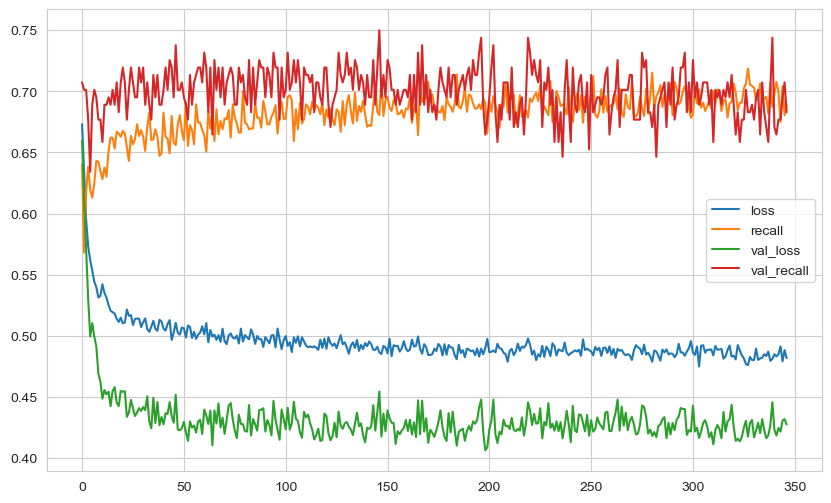

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 873us/step
[[1278  317]
 [ 105  300]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1595
           1       0.49      0.74      0.59       405

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



## Optuna

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [72]:
#pip install optun

In [73]:
import optuna
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
import matplotlib.pyplot as plt

In [75]:
# Define an Optuna objective function
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam  # Import Nadam here

def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int("n_units1", 8, 128), activation="relu", input_dim=X_train.shape[1]))
    model.add(Dropout(trial.suggest_float("dropout1", 0.0, 0.5)))
    model.add(Dense(trial.suggest_int("n_units2", 8, 128), activation="relu"))
    model.add(Dropout(trial.suggest_float("dropout2", 0.0, 0.5)))
    model.add(Dense(1, activation="sigmoid"))

    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "Adadelta", "RMSprop", "Nadam"])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    
    if optimizer_name == "Adam":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == "Adadelta":
        optimizer = Adadelta(learning_rate=learning_rate)
    elif optimizer_name == "RMSprop":
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = Nadam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", AUC(name="auc")])

    early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stop], verbose=0)

    return history.history["val_accuracy"][-1]

# Create an Optuna study
study = optuna.create_study(direction="maximize")

# Optimize hyperparameters
study.optimize(objective, n_trials=20)

# Get the best hyperparameters
best_params = study.best_params

# Create and train the final model with the best hyperparameters
final_model = Sequential()
final_model.add(Dense(best_params["n_units1"], activation="relu", input_dim=X_train.shape[1]))
final_model.add(Dropout(best_params["dropout1"]))
final_model.add(Dense(best_params["n_units2"], activation="relu"))
final_model.add(Dropout(best_params["dropout2"]))
final_model.add(Dense(1, activation="sigmoid"))
final_model.compile(optimizer=Adam(learning_rate=best_params["learning_rate"]), loss="binary_crossentropy", metrics=["accuracy", AUC(name="auc")])

history = final_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, callbacks=[EarlyStopping(monitor="val_loss", mode="min", patience=10, restore_best_weights=True)])



[I 2023-10-30 22:26:56,333] A new study created in memory with name: no-name-4e0f5830-d228-4bec-84dc-2e4366e07759
[I 2023-10-30 22:27:12,205] Trial 0 finished with value: 0.8131250143051147 and parameters: {'n_units1': 79, 'dropout1': 0.08159464105968312, 'n_units2': 15, 'dropout2': 0.12052347653791973, 'optimizer': 'Nadam', 'learning_rate': 1.2636676192655641e-05}. Best is trial 0 with value: 0.8131250143051147.
[I 2023-10-30 22:27:29,205] Trial 1 finished with value: 0.31437501311302185 and parameters: {'n_units1': 81, 'dropout1': 0.2880544134260676, 'n_units2': 119, 'dropout2': 0.4121678280474433, 'optimizer': 'Adadelta', 'learning_rate': 1.6338842941318978e-05}. Best is trial 0 with value: 0.8131250143051147.
[I 2023-10-30 22:27:46,885] Trial 2 finished with value: 0.3881250023841858 and parameters: {'n_units1': 98, 'dropout1': 0.060424641480623376, 'n_units2': 48, 'dropout2': 0.12615655337922005, 'optimizer': 'Adadelta', 'learning_rate': 2.013423814447013e-05}. Best is trial 0 wit

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4979 - accuracy: 0.7815 - auc: 0.6371 - val_loss: 0.4455 - val_accuracy: 0.8010 - val_auc: 0.7443
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8043 - auc: 0.7416 - val_loss: 0.4285 - val_accuracy: 0.8145 - val_auc: 0.7743
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8087 - auc: 0.7558 - val_loss: 0.4150 - val_accuracy: 0.8275 - val_auc: 0.7934
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8170 - auc: 0.7715 - val_loss: 0.4035 - val_accuracy: 0.8430 - val_auc: 0.8105
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8250 - auc: 0.7853 - val_loss: 0.3873 - val_accuracy: 0.8550 - val_auc: 0.8252
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8336 - auc: 0.8054 - val_loss

250/250 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8597 - auc: 0.8612 - val_loss: 0.3354 - val_accuracy: 0.8605 - val_auc: 0.8661
Epoch 48/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8593 - auc: 0.8587 - val_loss: 0.3349 - val_accuracy: 0.8600 - val_auc: 0.8661
Epoch 49/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8630 - auc: 0.8638 - val_loss: 0.3344 - val_accuracy: 0.8595 - val_auc: 0.8657
Epoch 50/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8581 - auc: 0.8616 - val_loss: 0.3339 - val_accuracy: 0.8595 - val_auc: 0.8668
Epoch 51/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8621 - auc: 0.8634 - val_loss: 0.3369 - val_accuracy: 0.8595 - val_auc: 0.8654
Epoch 52/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8610 - auc: 0.8644 - val_loss: 0.333

250/250 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8641 - auc: 0.8720 - val_loss: 0.3317 - val_accuracy: 0.8570 - val_auc: 0.8717
Epoch 94/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8677 - auc: 0.8760 - val_loss: 0.3301 - val_accuracy: 0.8550 - val_auc: 0.8718
Epoch 95/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3248 - accuracy: 0.8683 - auc: 0.8741 - val_loss: 0.3302 - val_accuracy: 0.8590 - val_auc: 0.8713
Epoch 96/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8673 - auc: 0.8737 - val_loss: 0.3289 - val_accuracy: 0.8620 - val_auc: 0.8713
Epoch 97/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8673 - auc: 0.8757 - val_loss: 0.3297 - val_accuracy: 0.8605 - val_auc: 0.8702
Epoch 98/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8680 - auc: 0.8744 - val_loss: 0.330

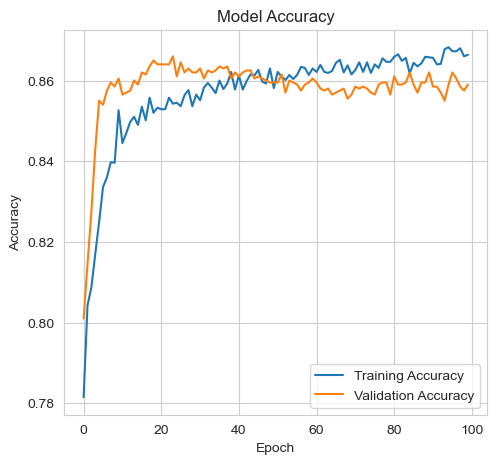

In [76]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

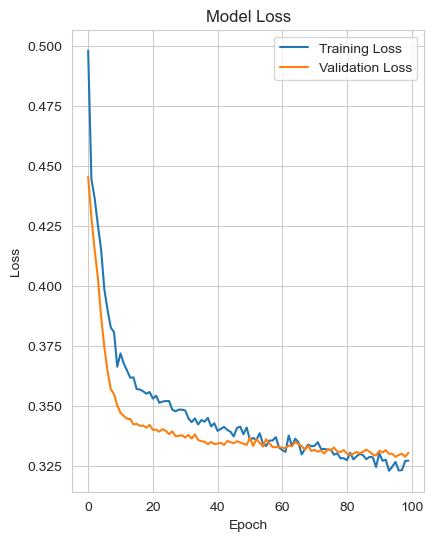

In [77]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [78]:
y_pred = final_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)


63/63 [==============================] - 0s 1ms/step


In [79]:
# Generate and display the confusion matrix and classification report

confusion = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)


In [80]:
print("Confusion Matrix:")
print(confusion)

print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[1516   79]
 [ 203  202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.50      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



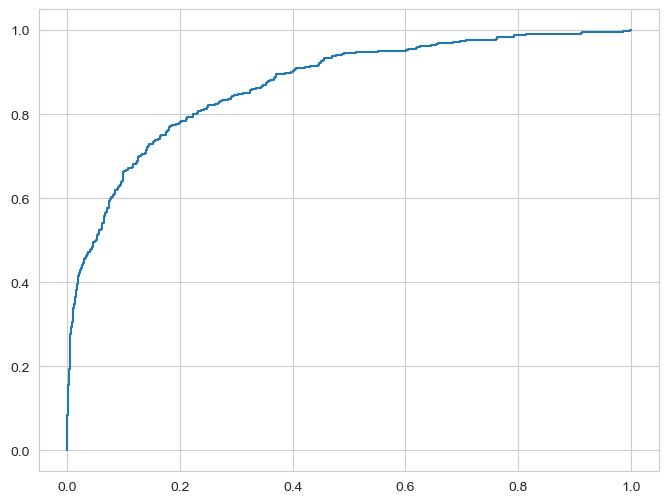

In [81]:
# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)

## Optuna is the final model and give us good results

# Final Model and Model Deployment

In [84]:
import pickle
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform your data using the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler to a file
with open("scaler_churn.pkl", 'wb') as file:
    pickle.dump(scaler, file)

In [86]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights)    


Epoch 1/200
32/32 [==============================] - 1s 7ms/step - loss: 0.6768 - recall: 0.6140 - val_loss: 0.6229 - val_recall: 0.6370
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6131 - recall: 0.6759 - val_loss: 0.6245 - val_recall: 0.7580
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5609 - recall: 0.7629 - val_loss: 0.5845 - val_recall: 0.7877
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5239 - recall: 0.7678 - val_loss: 0.5815 - val_recall: 0.8148
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5034 - recall: 0.7665 - val_loss: 0.5461 - val_recall: 0.8049
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4926 - recall: 0.7721 - val_loss: 0.5251 - val_recall: 0.7975
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4853 - recall: 0.7647 - val_loss: 0.4936 - val_recall: 0.7802
Epoch 8/200
32/32 [======================

32/32 [==============================] - 0s 3ms/step - loss: 0.4339 - recall: 0.7702 - val_loss: 0.4931 - val_recall: 0.7877
Epoch 61/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4349 - recall: 0.7721 - val_loss: 0.4613 - val_recall: 0.7679
Epoch 62/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4332 - recall: 0.7708 - val_loss: 0.4648 - val_recall: 0.7778
Epoch 63/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4330 - recall: 0.7702 - val_loss: 0.4926 - val_recall: 0.7901
Epoch 64/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4334 - recall: 0.7714 - val_loss: 0.4791 - val_recall: 0.7827
Epoch 65/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4322 - recall: 0.7721 - val_loss: 0.4689 - val_recall: 0.7704
Epoch 66/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4333 - recall: 0.7714 - val_loss: 0.4870 - val_recall: 0.7901
Epoch 67/200
32/32 [===========================

32/32 [==============================] - 0s 2ms/step - loss: 0.4265 - recall: 0.7770 - val_loss: 0.4588 - val_recall: 0.7679
Epoch 120/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4250 - recall: 0.7825 - val_loss: 0.4506 - val_recall: 0.7506
Epoch 121/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4261 - recall: 0.7837 - val_loss: 0.4448 - val_recall: 0.7506
Epoch 122/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4251 - recall: 0.7782 - val_loss: 0.4832 - val_recall: 0.7827
Epoch 123/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4246 - recall: 0.7862 - val_loss: 0.4751 - val_recall: 0.7778
Epoch 124/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4243 - recall: 0.7855 - val_loss: 0.4570 - val_recall: 0.7580
Epoch 125/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4261 - recall: 0.7800 - val_loss: 0.4559 - val_recall: 0.7556
Epoch 126/200
32/32 [====================

32/32 [==============================] - 0s 2ms/step - loss: 0.4202 - recall: 0.7868 - val_loss: 0.4480 - val_recall: 0.7531
Epoch 179/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4210 - recall: 0.7825 - val_loss: 0.4540 - val_recall: 0.7506
Epoch 180/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4201 - recall: 0.7825 - val_loss: 0.5051 - val_recall: 0.8049
Epoch 181/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4212 - recall: 0.7898 - val_loss: 0.4521 - val_recall: 0.7457
Epoch 182/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4208 - recall: 0.7819 - val_loss: 0.4644 - val_recall: 0.7630
Epoch 183/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4215 - recall: 0.7843 - val_loss: 0.4672 - val_recall: 0.7556
Epoch 184/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4208 - recall: 0.7812 - val_loss: 0.4997 - val_recall: 0.7852
Epoch 185/200
32/32 [====================

<Axes: >

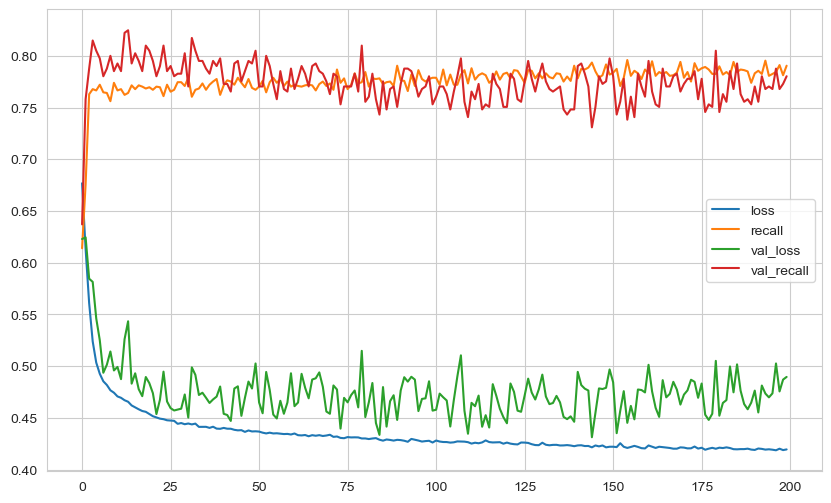

In [87]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [88]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4895683526992798
recall :  0.780246913433075


In [89]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 848us/step
[[1211  384]
 [  89  316]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1595
           1       0.45      0.78      0.57       405

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



In [90]:
model.save('model_churn.h5')

## Prediction

In [99]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore          619.000
Gender                 1.000
Age                   42.000
Tenure                 2.000
Balance                0.000
NumOfProducts          1.000
HasCrCard              1.000
IsActiveMember         1.000
EstimatedSalary   101348.880
Geo_France             1.000
Geo_Germany            0.000
Geo_Spain              0.000
Name: 0, dtype: float64

In [100]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 12))
single_customer

array([[ 6.19000000e+02,  1.00000000e+00,  4.20000000e+01,
         2.00000000e+00, -1.27009514e-16,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.01348880e+05,
         1.00000000e+00,  5.77315973e-17, -7.10542736e-18]])

In [101]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 22ms/step


array([[0]])

In [95]:
df["Exited"].iloc[0]

1

## Comparison with ML

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1111  484]
 [ 112  293]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1595
           1       0.38      0.72      0.50       405

    accuracy                           0.70      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.70      0.73      2000



In [104]:
from sklearn.ensemble import RandomForestClassifier


In [105]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1531   64]
 [ 208  197]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.49      0.59       405

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.85      0.86      0.85      2000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___